# Data Analysis

Dataset:

[Canada Immigration Data](https://www.kaggle.com/datasets/ammaraahmad/immigration-to-canada)

The goal of this analysis is to investigate immigration trends into Canada for the years 2007 to 2013.
My objectives are to:
1. Visualize immigration into Canada by continent.
2. Identify the country on each continent where the majority of immigrants arrived in Canada between 2008 and 2013.

# The Data
The data contains information of immigrants record into Canada from 1980 to 2013.


In [1]:
#Immigration statistics
import pandas as pd
import numpy as np
original_data=pd.read_csv('C:/Users/Xavier/Desktop/canadian_immegration_data.csv')
data=original_data.copy()
data.head(3)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


The dataset is loaded correctly. The column names are self explanatory.

I proceed to check if there are any missing values in the dataset

In [2]:
data.isnull().values.any()

False

Therefore, there are no missing values in the dataset.

# Objective 1

I proceed to create a new dataset of continents and total migration. I select just the columns I need for my analysis.

In [3]:
conti_new=data[['Continent', '2007', '2008', '2009', '2010', '2011', '2012', '2013' ]]
continent_sum= conti_new.groupby('Continent', as_index=True).sum()
continent_sum.head(1)

,2007,2008,2009,2010,2011,2012,2013
Continent,,,,,,,
Africa,28284,29890,34534,40892,35441,38083,38543


I observe the output and find that I do not like the display format. I would like to see continent as columns and Years as rows. So I do the following:

In [4]:
continent_sum=continent_sum.T
continent_sum.head(1)

Continent,Africa,Asia,Europe,Latin America and the Caribbean,Northern America,Oceania
2007,28284,133459,33495,26011,9463,1693


Having my desired output, I proceed to visualize my dataset

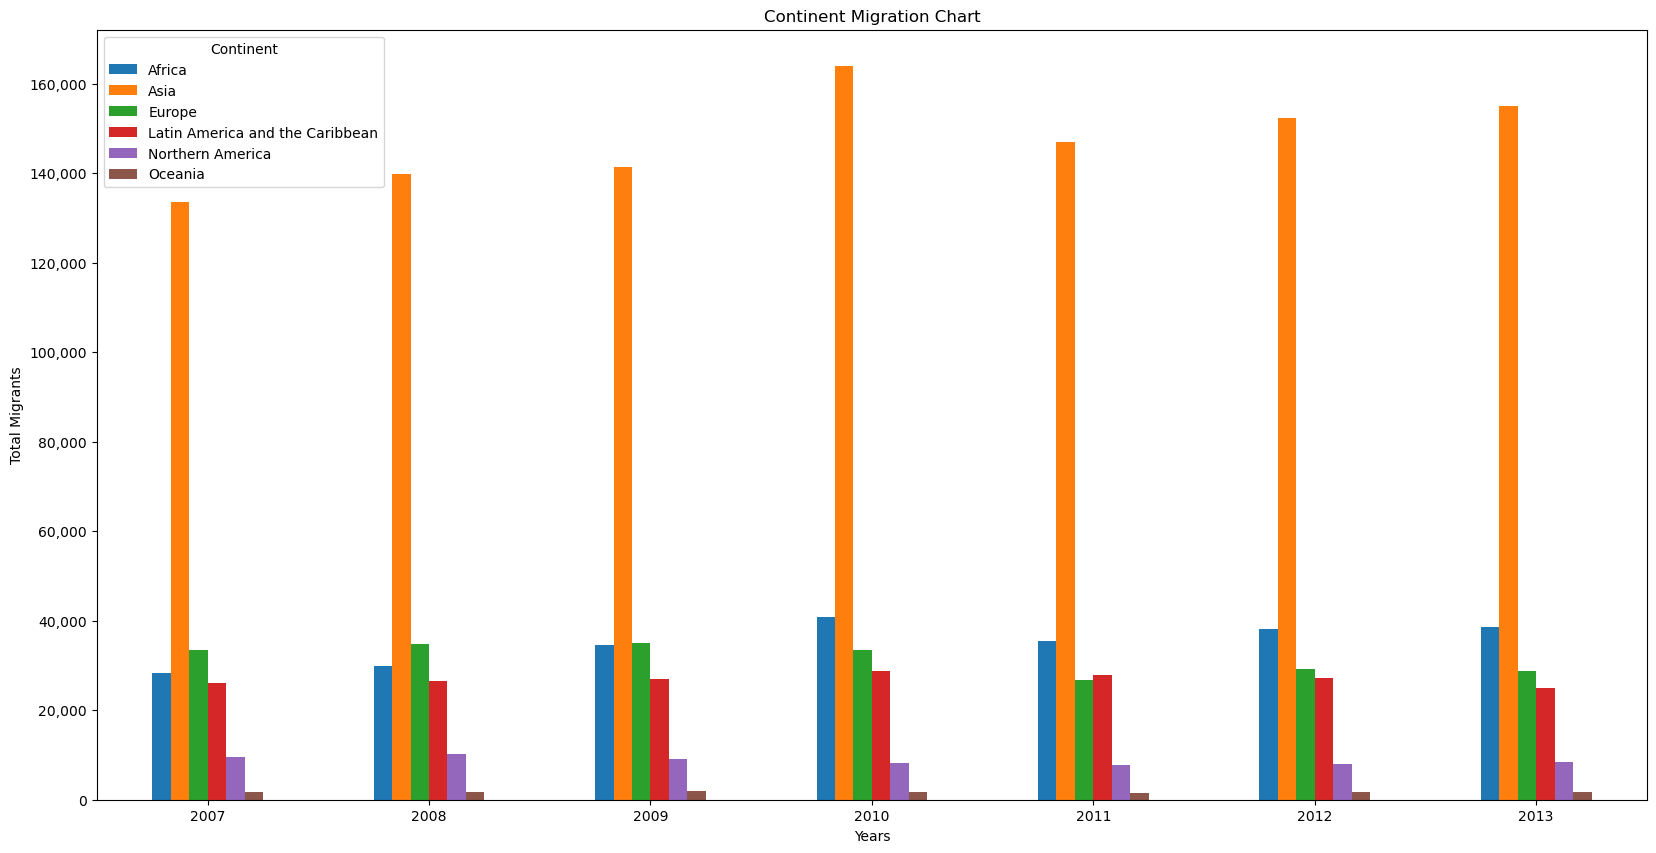

In [13]:
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = (20,10)
fig, ax = plt.subplots()
continent_chart=continent_sum.plot(kind='bar', ax=ax)
plt.xticks(rotation='horizontal')
continent_chart.set_xlabel('Years')
continent_chart.set_ylabel('Total Migrants')
continent_chart.set_title('Continent Migration Chart')
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.show()


From the visualization, I draw the following conclusions:
1. Asia had the highest number of immigrants into Canada for the period under consideration.
2. Oceania had the lowest number of immigrants into Canada. 
3. For the years 2010-2013, Africa had more immigrants into Canada than Europe which wasn't the case in previous years. 

I proceed to find out which countries had the highest immigrants in each continent. 

# Objective 2

There are some columns which are irrelevant to the goal of my analysis. 
I am only interested in the Countries and Continent data for the years 2007 to 2013, so I create a new dataset removing irrelevant columns.

In [75]:
continent_data=data[['Country', 'Continent', '2007', '2008', '2009','2010','2011','2012','2013']]
continent_data.head(3)

,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,702,560,716,561,539,620,603
2,Algeria,Africa,3623,4005,5393,4752,4325,3774,4331


Having my desired dataset, I proceed to view the continents in the dataset and store it in an array for future analytics.



In [76]:
continent_array=continent_data['Continent'].unique()
print(continent_array)

['Asia' 'Europe' 'Africa' 'Oceania' 'Latin America and the Caribbean'
 'Northern America']


I then create a list of countries in each continent with highest number of immigrant records

In [77]:
continentd=[]
for i in continent_array:
    cont_data=continent_data['Continent'].isin([i])
    new_cont=continent_data[cont_data]
    continentd.append(new_cont)

From the continent array I created, I can get the position of each continent in the list I created above.

I split this list into data for each continent as seen below and verify the first rows of each

In [78]:
asia_data=continentd[0]
europe_data=continentd[1]
africa_data=continentd[2]
oceania_data=continentd[3]
latin_data=continentd[4]
north_data=continentd[5]

display(north_data.head(1), africa_data.head(1), europe_data.head(1), 
        oceania_data.head(1), latin_data.head(1), asia_data.head(1))

,Country,Continent,2007,2008,2009,2010,2011,2012,2013
32,Canada,Northern America,0,0,0,0,1,1,2


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
2,Algeria,Africa,3623,4005,5393,4752,4325,3774,4331


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
1,Albania,Europe,702,560,716,561,539,620,603


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
3,American Samoa,Oceania,0,0,0,0,0,0,0


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
6,Antigua and Barbuda,Latin America and the Caribbean,15,32,38,27,37,51,25


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,2652,2111,1746,1758,2203,2635,2004


I find that the result meeets my expectations.

 
I realize that the numbering is unordered since each datasets inherited its indexing from its parent list. 
Both issues were resolved with the following code:

In [79]:
asia_data=asia_data.reset_index(drop=True)
europe_data=europe_data.reset_index(drop=True)
africa_data=africa_data.reset_index(drop=True)
oceania_data=oceania_data.reset_index(drop=True)
latin_data=latin_data.reset_index(drop=True)
north_data=north_data.reset_index(drop=True)

To verify I achieved my aim, I display the first rows of each dataset.

In [80]:
display(north_data.head(1), africa_data.head(1), europe_data.head(1), 
        oceania_data.head(1), latin_data.head(1), asia_data.head(1))

,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,Canada,Northern America,0,0,0,0,1,1,2


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,Algeria,Africa,3623,4005,5393,4752,4325,3774,4331


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,Albania,Europe,702,560,716,561,539,620,603


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,American Samoa,Oceania,0,0,0,0,0,0,0


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,Antigua and Barbuda,Latin America and the Caribbean,15,32,38,27,37,51,25


,Country,Continent,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,2652,2111,1746,1758,2203,2635,2004


Thus, I get the result I expected which is more cleaner and readable.

I proceed to create a list containing countries with maximum immigrants for all continents.

In [81]:
list1=[europe_data, asia_data,oceania_data,latin_data,north_data, africa_data]
all_max=[]
for j in range(len(list1)):
    for i in range(2, len(list1[j].columns)):
        e_d=list1[j].iloc[:,i].max()
        e_d2=list1[j][list1[j].iloc[:,i].isin([e_d])]
        d1=e_d2.iloc[:,[0,i]]
        all_max.append(d1)


I create an array with the list I obtained above.
I then proceed to split the array into six different parts since there are six continents in the dataset.
Afterwards, I assign each array to its appropriate country data and added columns to beautify the dataset.

In [82]:
continent_arr=np.array(all_max).reshape(len(all_max),2)
continent_arr=np.array_split(continent_arr,6)
europe_max=pd.DataFrame(continent_arr[0], 
                        index=['2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                        columns=['Country with Highest immigrants from Europe', 'Total Migrants'])
asia_max=pd.DataFrame(continent_arr[1], 
                        index=['2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                        columns=['Country with Highest immigrants from Asia', 'Total Migrants'])
oceania_max=pd.DataFrame(continent_arr[2], 
                        index=['2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                        columns=['Country with Highest immigrants from Oceania', 'Total Migrants'])
latin_max=pd.DataFrame(continent_arr[3], 
                        index=['2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                        columns=['Country with Highest immigrants from South America', 'Total Migrants'])
north_max=pd.DataFrame(continent_arr[4], 
                        index=['2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                        columns=['Country with Highest immigrants from North America', 'Total Migrants'])
africa_max=pd.DataFrame(continent_arr[5], 
                        index=['2007', '2008', '2009', '2010', '2011', '2012', '2013'],
                        columns=['Country with Highest immigrants from Africa', 'Total Migrants'])

The countries in each continent with the greatest annual immigration rates are shown in the results below:

In [1]:
display(africa_max, europe_max, oceania_max, north_max, asia_max, latin_max)

NameError: name 'africa_max' is not defined